In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import copy, random
from collections import defaultdict, Counter
import networkx as nx
from powerlaw import *

In [3]:
# read graph
DiGraph = nx.read_edgelist('data/blog.txt', create_using=nx.DiGraph)
G = DiGraph.to_undirected()

In [4]:
# plot the degree distribution
degrees = [G.degree(x) for x in G]
degcount = Counter(degrees)
deg, cnt = list(degcount.keys()), list(degcount.values())
totalcnt = sum(cnt)
prob = [x / totalcnt for x in cnt]

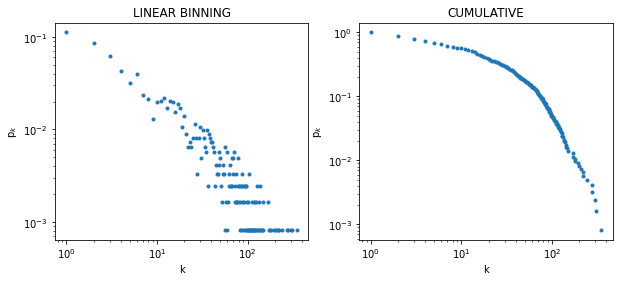

In [5]:
fig = plt.figure(figsize=(10,4))

ax1 = fig.add_subplot(121)
ax1.loglog(deg, prob, '.')
ax1.set_xlabel('k')
ax1.set_ylabel(r'p$_k$')
ax1.set_title('LINEAR BINNING')

ax2 = fig.add_subplot(122)
deg.sort()
prob = [degcount[x]/totalcnt for x in deg]
cum = [0]
for x in prob[::-1]:
    cum.append(x + cum[-1])
cum = cum[1:][::-1]
ax2.loglog(deg, cum, '.')
ax2.set_xlabel('k')
ax2.set_ylabel(r'p$_k$')
ax2.set_title('CUMULATIVE')

plt.show()

In [6]:
# calculate power-law exponent (without xmax)
degrees = [x for x in degrees if x > 0]
fit_res = Fit(degrees, discrete=True)
print('The estimated exponent is ' + str(fit_res.power_law.alpha))
print('The estimated minimum-x is ' + str(fit_res.power_law.xmin))

The estimated exponent is 3.6669988090887244
The estimated minimum-x is 79.0


Calculating best minimal value for power law fit
/Users/hengjiwang/Documents/hydranerv/hydranerv/models/reaggregation/powerlaw/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /
/Users/hengjiwang/Documents/hydranerv/hydranerv/models/reaggregation/powerlaw/powerlaw.py:699: RuntimeWarning: divide by zero encountered in true_divide
  (CDF_diff**2) /


In [7]:
# build configuration model
config_graph = nx.configuration_model(deg_sequence=degrees, create_using=nx.Graph(), seed=None)

# remove edges from config graph (reversed growing process)
stages = [copy.deepcopy(config_graph)]
num_edges = config_graph.number_of_edges()
ncheckpoints = 5

for i in range(ncheckpoints - 1):
    to_remove = random.sample(config_graph.edges(), k=num_edges // ncheckpoints)
    config_graph.remove_edges_from(to_remove)
    stages.append(copy.deepcopy(config_graph))
    
stages.reverse()

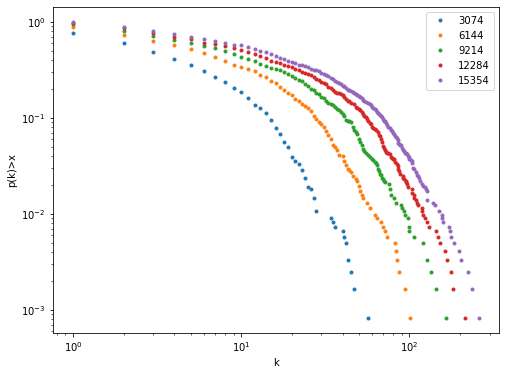

In [8]:
# plot degree distribution evolution
fig, ax = plt.subplots(1, 1, figsize=(8,6))
for g in stages:
    degrees = [g.degree(x) for x in g]
    degcount = Counter(degrees)
    deg, cnt = list(degcount.keys()), list(degcount.values())
    totalcnt = sum(cnt)
    prob = [x / totalcnt for x in cnt]
    
    deg.sort()
    prob = [degcount[x]/totalcnt for x in deg]
    cum = [0]
    for x in prob[::-1]:
        cum.append(x + cum[-1])
    cum = cum[1:][::-1]
    ax.loglog(deg, cum, '.', label=g.number_of_edges())
ax.set_xlabel('k')
ax.set_ylabel('p(k)>x')
ax.legend()
plt.show()

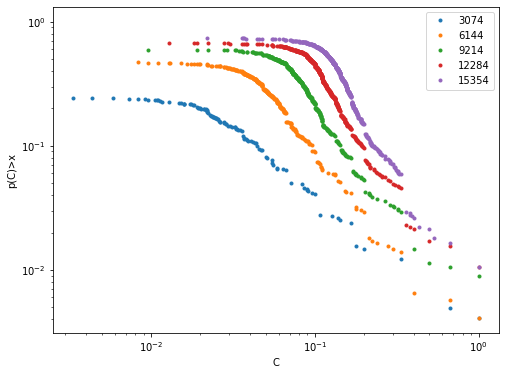

In [9]:
# plot clustering coefficients distribution evolution
fig, ax = plt.subplots(1, 1, figsize=(8,6))
for g in stages:
    clusterings = nx.clustering(g).values()
    clstrcount = Counter(clusterings)
    clstr, cnt = list(clstrcount.keys()), list(clstrcount.values())
    totalcnt = sum(cnt)
    prob = [x / totalcnt for x in cnt]
    
    clstr.sort()
    prob = [clstrcount[x] / totalcnt for x in clstr]
    cum = [0]
    for x in prob[::-1]:
        cum.append(x + cum[-1])
    cum = cum[1:][::-1]
    ax.loglog(clstr, cum, '.', label=g.number_of_edges())
ax.set_xlabel('C')
ax.set_ylabel('p(C)>x')
ax.legend()
plt.show()

In [10]:
# calculate clustering coefficients versus degree
def average_clustering_by_degree(g):
    clusterings = nx.clustering(g)
    clstr_k = defaultdict(list)
    for node in clusterings:
        clstr_k[g.degree(node)].append(clusterings[node])
    for k in clstr_k:
        clstr_k[k] = np.average(clstr_k[k])
    return clstr_k

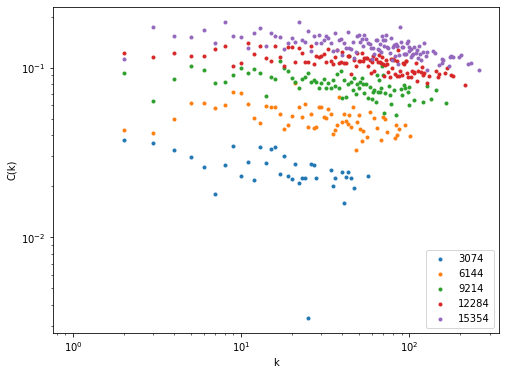

In [11]:
# plot clustering coefficients versus degree
fig, ax = plt.subplots(1, 1, figsize=(8,6))
for g in stages:
    clstr_k = average_clustering_by_degree(g)
    k, clstr = list(clstr_k.keys()), list(clstr_k.values())
    totalcnt = sum(cnt)
    ax.loglog(k, clstr, '.', label=g.number_of_edges())
ax.set_xlabel('k')
ax.set_ylabel('C(k)')
ax.legend()
plt.show()

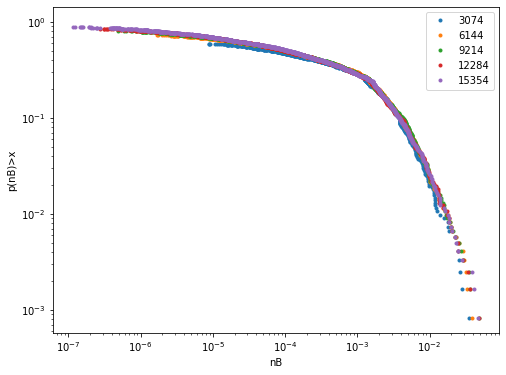

In [12]:
# plot node betweenness centrality evolution
fig, ax = plt.subplots(1, 1, figsize=(8,6))
for g in stages:
    nB = nx.betweenness_centrality(g).values()
    nbcount = Counter(nB)
    nb, cnt = list(nbcount.keys()), list(nbcount.values())
    totalcnt = sum(cnt)
    prob = [x / totalcnt for x in cnt]
    
    nb.sort()
    prob = [nbcount[x] / totalcnt for x in nb]
    cum = [0]
    for x in prob[::-1]:
        cum.append(x + cum[-1])
    cum = cum[1:][::-1]
    ax.loglog(nb, cum, '.', label=g.number_of_edges())
ax.set_xlabel('nB')
ax.set_ylabel('p(nB)>x')
ax.legend()
plt.show()

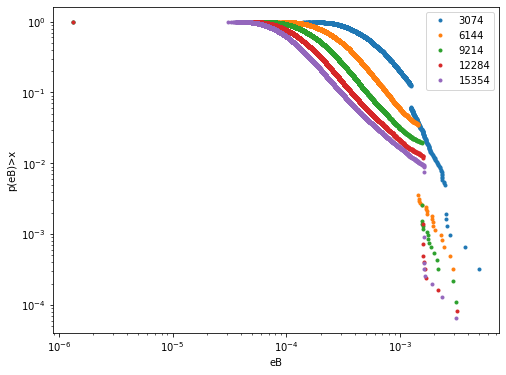

In [17]:
# plot edge betweenness centrality evolution
fig, ax = plt.subplots(1, 1, figsize=(8,6))
for g in stages:
    edge_betweenness = nx.edge_betweenness_centrality(g).values()
    ebcount = Counter(edge_betweenness)
    eb, cnt = list(ebcount.keys()), list(ebcount.values())
    totalcnt = sum(cnt)
    prob = [x / totalcnt for x in cnt]
    
    eb.sort()
    prob = [ebcount[x] / totalcnt for x in eb]
    cum = [0]
    for x in prob[::-1]:
        cum.append(x + cum[-1])
    cum = cum[1:][::-1]
    ax.loglog(eb, cum, '.', label=g.number_of_edges())
ax.set_xlabel('eB')
ax.set_ylabel('p(eB)>x')
ax.legend()
plt.show()